<h1>Определение перспективного тарифа для телеком-компании</h1>

Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<b>Примечание.</b>

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

<h1>Описание данных</h1>

Таблица <b>users</b> (информация о пользователях):

user_id — уникальный идентификатор пользователя

first_name — имя пользователя

last_name — фамилия пользователя

age — возраст пользователя (годы)

reg_date — дата подключения тарифа (день, месяц, год)

churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

city — город проживания пользователя

tariff — название тарифного плана


Таблица <b>calls</b> (информация о звонках):

id — уникальный номер звонка

call_date — дата звонка

duration — длительность звонка в минутах

user_id — идентификатор пользователя, сделавшего звонок


Таблица <b>messages</b> (информация о сообщениях):

id — уникальный номер сообщения

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение


Таблица <b>internet</b> (информация об интернет-сессиях):

id — уникальный номер сессии

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

session_date — дата интернет-сессии

user_id — идентификатор пользователя


Таблица <b>tariffs</b> (информация о тарифах):

tariff_name — название тарифа

rub_monthly_fee — ежемесячная абонентская плата в рублях

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

## Изучение данных из файла

Прежде чем приступать к основной части проекта изучим содержимое архива.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')



In [3]:
display(calls.head())
display(internet.head())
display(messages.head())
display(tariffs.head())
users.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


У таблицы internet имеется лишний столбец с индексами.

In [4]:
display(calls.info())
display(internet.info())
display(messages.info())
display(tariffs.info())
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Проверим данные на наличие отрицательных значений

In [5]:
display(calls[calls['duration'] < 0])
display(internet[internet['mb_used'] < 0])
users[users['age'] < 0]

,id,call_date,duration,user_id


,Unnamed: 0,id,mb_used,session_date,user_id


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff


Проверим на дубликаты

In [6]:
display(calls.duplicated().sum())
display(internet.duplicated().sum())
display(messages.duplicated().sum())
display(tariffs.duplicated().sum())
users.duplicated().sum()

0

0

0

0

0

In [7]:
display(users['city'].unique())
users['tariff'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

array(['ultra', 'smart'], dtype=object)

Ошибок в данных не наблюдаю

### Вывод

Имеется ошибка в таблице internet: лишний столбец с индексами, по всему остальному датасету ошибок не обнаружил

## Предобработка данных

Исправим ошибки из прошлого пункта

In [8]:
internet = internet.drop('Unnamed: 0', axis=1)

In [9]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Нулевых интернет-сессий: 0.13 %


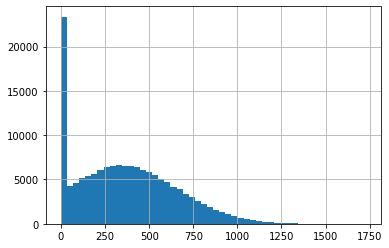

In [24]:
# Комментарий ревьюера 2
temp = internet.copy()
temp['mb_used'].hist(bins = 50)
print('Нулевых интернет-сессий:',round(temp['mb_used'].value_counts().sort_index()[0]/temp['mb_used'].count(),2), '%')

Посчитаем для кажого пользователя (с учетом округлений):

количество сделанных звонков и израсходованных минут разговора по месяцам;

In [10]:
calls['month'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d').dt.month
display(calls.head())
calls['duration'] = np.ceil(calls['duration'])
calls_monthly = calls.groupby(['user_id','month'])['duration'].sum()
calls_monthly = calls_monthly.reset_index()
calls_monthly.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


,user_id,month,duration
0,1000,5,159.0
1,1000,6,172.0
2,1000,7,340.0
3,1000,8,408.0
4,1000,9,466.0
5,1000,10,350.0
6,1000,11,338.0
7,1000,12,333.0
8,1001,11,430.0
9,1001,12,414.0


количество отправленных сообщений по месяцам;

In [11]:
messages['month'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d').dt.month
display(messages.head())
messages_monthly = messages.groupby(['user_id','month'])['message_date'].count()
messages_monthly = messages_monthly.reset_index()
messages_monthly = messages_monthly.rename(columns={'message_date' : 'messages_number'})
messages_monthly.head(10)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


,user_id,month,messages_number
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


объем израсходованного интернет-трафика по месяцам;

In [12]:
internet['month'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d').dt.month
display(internet.head())
internet_monthly = internet.groupby(['user_id','month'])['mb_used'].sum()
internet_monthly = internet_monthly.reset_index()
internet_monthly['gb_used'] = np.ceil(internet_monthly['mb_used'] / 1024)
internet_monthly.head(10)

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


,user_id,month,mb_used,gb_used
0,1000,5,2253.49,3.0
1,1000,6,23233.77,23.0
2,1000,7,14003.64,14.0
3,1000,8,14055.93,14.0
4,1000,9,14568.91,15.0
5,1000,10,14702.49,15.0
6,1000,11,14756.47,15.0
7,1000,12,9817.61,10.0
8,1001,11,18429.34,18.0
9,1001,12,14036.66,14.0


помесячную выручку с каждого пользователя

In [13]:
df = calls_monthly.merge(
    messages_monthly, on=['user_id', 'month'], how='outer'
).merge(
    internet_monthly, on=['user_id', 'month'], how='outer'
).merge(
    users, on=['user_id'])
tariffs = tariffs.rename(columns = {'tariff_name' : 'tariff'})
df = df.merge(tariffs, on='tariff')
df = df.drop(['mb_used', 'churn_date', 'age', 'first_name', 'last_name', 'reg_date'], axis=1)
df.tail()

,user_id,month,duration,messages_number,gb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
3209,1489,8,NaN,17.0,11.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3210,1489,9,NaN,32.0,17.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3211,1489,10,NaN,21.0,20.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3212,1489,11,NaN,20.0,18.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3213,1489,12,NaN,35.0,17.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3


In [15]:
def revenue(df):
    revenue_min = 0
    revenue_mes = 0
    revenue_internet = 0
    if (df['duration'] - df['minutes_included']) > 0:
        revenue_min = np.ceil(df['duration'] - df['minutes_included']) * df['rub_per_minute']
    if (df['messages_number'] - df['messages_included']) > 0:
        revenue_mes = (df['messages_number'] - df['messages_included']) * df['rub_per_message']
    if (df['gb_used'] - df['mb_per_month_included'] / 1024) > 0:
        revenue_internet = np.ceil(df['gb_used'] - df['mb_per_month_included'] / 1024) * df['rub_per_gb']
    if df['tariff'] == 'ultra':
        revenue_tariff = 1950
    if df['tariff'] == 'smart':
        revenue_tariff = 550
    return revenue_min + revenue_mes + revenue_internet + revenue_tariff
    
df['income'] = df.apply(revenue, axis=1)
df.tail()

,user_id,month,duration,messages_number,gb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
3209,1489,8,NaN,17.0,11.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,550.0
3210,1489,9,NaN,32.0,17.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,950.0
3211,1489,10,NaN,21.0,20.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,1550.0
3212,1489,11,NaN,20.0,18.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,1150.0
3213,1489,12,NaN,35.0,17.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,950.0


In [16]:
print(df[df['tariff'] == 'smart']['income'].mean() * users[users['tariff'] == 'smart']['age'].count())
print(df[df['tariff'] == 'ultra']['income'].mean() * users[users['tariff'] == 'ultra']['age'].count())

452780.7092866757
308452.69035532995


В среднем клиенты с тарифом "смарт" приносят больше денег, чем клиенты "ультры"

## Анализ данных

Опишем поведение клиентов оператора с разными тарифами. Для этого найдем среднее, дисперсию, стандартное отклонение и построим гистограммы использования интернета, звонков и сообщений для каждого тарифа

In [17]:
print('CALLS:')
ultra_mean = (df[df['tariff'] == 'ultra']['duration']).mean()
smart_mean = (df[df['tariff'] == 'smart']['duration']).mean()
print('ultra_calls_mean:',ultra_mean,'smart_calls_mean:', smart_mean)
ultra_var =  np.var(df[df['tariff'] == 'ultra']['duration'])
smart_var =  np.var(df[df['tariff'] == 'smart']['duration'])
print('ultra_calls_var:',ultra_var,'smart_calls_var:', smart_var)
ultra_std = np.std(df[df['tariff'] == 'ultra']['duration'])
smart_std =  np.std(df[df['tariff'] == 'smart']['duration'])
print('ultra_calls_std:',ultra_std,'smart_calls_std:', smart_std)

print('MESSAGES:')
ultra_mean = (df[df['tariff'] == 'ultra']['messages_number']).mean()
smart_mean = (df[df['tariff'] == 'smart']['messages_number']).mean()
print('ultra_messages_mean:',ultra_mean,'smart_messages_mean:', smart_mean)
ultra_var =  np.var(df[df['tariff'] == 'ultra']['messages_number'])
smart_var =  np.var(df[df['tariff'] == 'smart']['messages_number'])
print('ultra_messages_var:',ultra_var,'smart_messages_var:', smart_var)
ultra_std = np.std(df[df['tariff'] == 'ultra']['messages_number'])
smart_std =  np.std(df[df['tariff'] == 'smart']['messages_number'])
print('ultra_messages_std:',ultra_std,'smart_messages_std:', smart_std)

print('INTERNET:')
ultra_mean = (df[df['tariff'] == 'ultra']['gb_used']).mean()
smart_mean = (df[df['tariff'] == 'smart']['gb_used']).mean()
print('ultra_gb_mean:',ultra_mean,'smart_gb_mean:', smart_mean)
ultra_var =  np.var(df[df['tariff'] == 'ultra']['gb_used'])
smart_var =  np.var(df[df['tariff'] == 'smart']['gb_used'])
print('ultra_gb_var:',ultra_var,'smart_gb_var:', smart_var)
ultra_std = np.std(df[df['tariff'] == 'ultra']['gb_used'])
smart_std =  np.std(df[df['tariff'] == 'smart']['gb_used'])
print('ultra_gb_std:',ultra_std,'smart_gb_std:', smart_std)

CALLS:
ultra_calls_mean: 545.4511041009464 smart_calls_mean: 419.0629779577148
ultra_calls_var: 94104.36117385984 smart_calls_var: 35828.06530953033
ultra_calls_std: 306.76434143143143 smart_calls_std: 189.2830296395594
MESSAGES:
ultra_messages_mean: 61.161006289308176 smart_messages_mean: 38.71644120707596
ultra_messages_var: 2107.0055235156838 smart_messages_var: 717.220843110227
ultra_messages_std: 45.90212983637779 smart_messages_std: 26.780979129042816
INTERNET:
ultra_gb_mean: 19.694358974358973 smart_gb_mean: 16.33617594254937
ultra_gb_var: 94.05017330703485 smart_gb_var: 32.908978554322495
ultra_gb_std: 9.697946860394465 smart_gb_std: 5.73663477609674


В среднем, пользователи с тарифом ультра больше тратят минуты, сообщения и траффик, что в полне логично, т.к. тариф имеет бóльшие пакеты по каждой из этих опций.

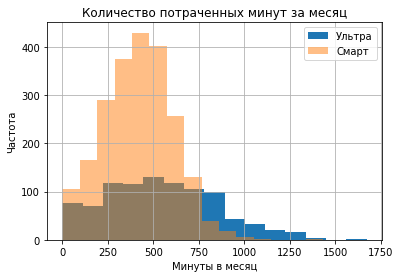

In [18]:
df_ultra = df[df['tariff'] == 'ultra']
df_smart = df[df['tariff'] == 'smart']
(df_ultra['duration']).plot(kind='hist', bins=15, grid=True, label='Ультра')
(df_smart['duration']).plot(kind='hist', bins=15, grid=True, alpha=0.5, label='Смарт')
plt.legend()
plt.xlabel('Минуты в месяц')
plt.ylabel('Частота')
plt.title('Количество потраченных минут за месяц')
plt.show()

По графику заметно, что около половины клиентов с тарифом "смарт" не укладываются в 500 минут в месяц. И при этом все клиенты с тарифом "ультра" не преодолевают 2000 минут в месяц.

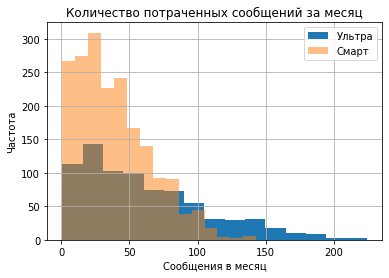

In [19]:
df_ultra['messages_number'].plot(kind='hist', bins=15, grid=True, label='Ультра')
df_smart['messages_number'].plot(kind='hist', bins=15, grid=True, alpha=0.5, label='Смарт')
plt.legend()
plt.xlabel('Сообщения в месяц')
plt.ylabel('Частота')
plt.title('Количество потраченных сообщений за месяц')
plt.show()

Здесь ситуация для клиентов "смарта" чуть лучше, но все равно достаточно много людей преодолевают порог и переплачивают за сообщения. Лишь несколько человек среди владельцев тарифа "ультра" превосходят пятую часть от тарифного плана.

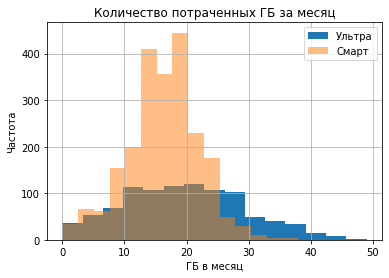

In [20]:
df_ultra['gb_used'].plot(kind='hist', bins=15, grid=True, label='Ультра')
df_smart['gb_used'].plot(kind='hist', bins=15, grid=True, alpha=0.5, label='Смарт')
plt.legend()
plt.xlabel('ГБ в месяц')
plt.ylabel('Частота')
plt.title('Количество потраченных ГБ за месяц')
plt.show()

У тарифа "смарт" ситуация такая же, как и со звонками: около половины клиентов преодолевают порог. Но и у большой части клиентов "ультра" есть проблема нехватки трафика.

"Средний" клиент "ультры" не использует предложенные в тарифе звонки, минуты и гигабайты. При этом клиент "смарта" почти полностью использует звонки и смс, а объем данного интернет траффика и вовсе превосходит.

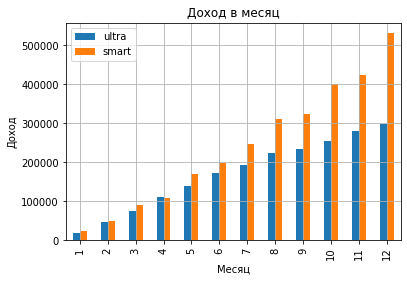

In [21]:
ultra_income = pd.DataFrame(df_ultra.groupby('month')['income'].sum()).reset_index()
smart_income = pd.DataFrame(df_smart.groupby('month')['income'].sum()).reset_index()
us = ultra_income.merge(smart_income, on='month')
us.columns = ['month', 'ultra', 'smart']
us.plot(x='month', kind='bar', grid=True)
plt.xlabel('Месяц')
plt.ylabel('Доход')
plt.title('Доход в месяц')
plt.legend()
plt.show()

Видно, что практически на протяжении всего года тариф "смарт" обгоняет по выручке. При этом наблюдается рост выручки по обоим тарифам, но темп роста у тарифа "смарт" выше.

## Проверка гипотез

1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Исходя из выражения выше, формируем нулевую и альтернаятивную гипотезы:

Н0 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны;
Н1 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Проверку нулевой гипотезы проведем с помощью теста ttest_ind с учетом разных дисперсий, т.к. имеем две генеральные независящие друг от друга совокупности.

In [22]:
alpha = 0.05
results = st.ttest_ind(
    df[df['tariff'] == 'ultra']['income'], 
    df[df['tariff'] == 'smart']['income'],
    equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Значит средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
Исходя из выражения выше, формируем нулевую и альтернаятивную гипотезы:

Н0 - Средняя выручка пользователей из Москвы и выручка пользователей из других регионов равны;
Н1 - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Проверку нулевой гипотезы проведем с помощью теста ttest_ind с учетом разных дисперсий, т.к. имеем две генеральные независящие друг от друга совокупности.

In [23]:
alpha = 0.05
results = st.ttest_ind(
    df[df['city'] == 'Москва']['income'], 
    df[df['city'] != 'Москва']['income'],
    equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Значит средняя выручка пользователей из Москвы и выручка пользователей из других регионов примерно равны

## Общий вывод

Среди данных двух вариантов, явным лидером является тариф "смарт". Данный тариф проще в реализации (у него ниже цена, следовательно ниже порог вхождения пользователя), клиентов данного тарифа больше в 2 раза. Сам тариф на протяжении всего 2018 года приносил больше денег, чем его соперник (в среднем на 150000р. в месяц). Темп роста выручки тарифа выше.